# Shopi Nurhidayanti Institut Teknologi Garut 


## 1. Transformasi Geometri Pada Citra

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


### Translasi Citra 

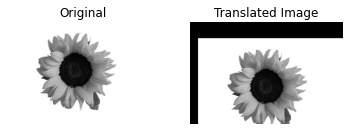

In [4]:
import numpy as np
def translate(img, x, y): 
    height, width = img.shape
    res = np.zeros(img.shape)
    res[y:, x:] = img[:height-y, :width-x] 
    return res 

from skimage import io, color 
from matplotlib import pyplot as plt 
i1 = color.rgb2gray(io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/bunga-matahari.png'))
i2 = translate(i1, 25, 50)
plt.subplot(1, 2, 1);
plt.imshow(i1, cmap='gray')
plt.title('Original'); 
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(i2, cmap='gray')
plt.title('Translated Image'); 
plt.axis('off')
plt.show()


### Skala Citra

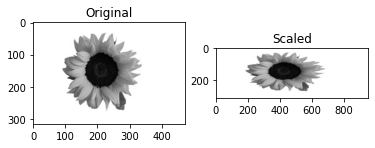

In [5]:
def perbesar(img, scX, scY):
    width, height = img.shape
    r = width * scX
    c = height * scY
    newImg = np.zeros((r,c))
    for i in range(0, r):
        for j in range(0, c):
            newImg[i][j] = img[i//scX][j//scY]
    return newImg

i2 = perbesar(i1, 1, 2)
plt.subplot(1,2,1); plt.imshow(i1, cmap='gray')
plt.title('Original')
plt.subplot(1,2,2); plt.imshow(i2, cmap='gray')
plt.title("Scaled")
plt.show()

### Rotasi Citra

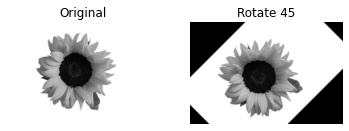

In [6]:
from skimage.transform import rotate
i1_rotate = rotate(i1, 45)
plt.subplot(1,2,1); plt.imshow(i1, cmap='gray')
plt.title('Original'); 
plt.axis("off")
plt.subplot(1,2,2); 
plt.imshow(i1_rotate, cmap='gray')
plt.title("Rotate 45"); 
plt.axis("off")
plt.show()


## 2. Image Enhancement (Spatial Domain)

### a. Point Processing

### Image Negative

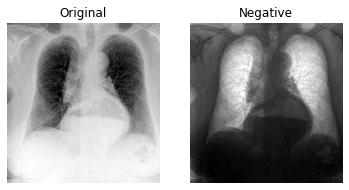

In [7]:
i1 = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/rontgen.jpg')
i2 = 255-i1
plt.subplot(1,2,1); 
plt.imshow(i1)
plt.title('Original'); 
plt.axis("off")
plt.subplot(1,2,2); 
plt.imshow(i2)
plt.title('Negative'); 
plt.axis("off")
plt.show()


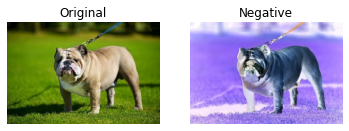

In [8]:
i3 = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/Gambar-anjing-bulldog.jpg')
i4 = 255-i3
plt.subplot(1,2,1); 
plt.imshow(i3)
plt.title('Original'); 
plt.axis("off")
plt.subplot(1,2,2); 
plt.imshow(i4)
plt.title('Negative'); 
plt.axis("off")
plt.show()

### Log Transformation


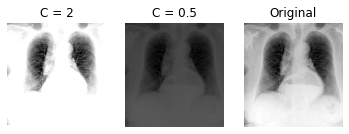

In [9]:
a = i1/255
c1 = 0.5
c2 = 2
f1 = c1*np.log(1 + (a))
f2 = c2*np.log(1 + (a))
plt.subplot(1,3,3); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f1)
plt.title('C = 0.5'); plt.axis("off")
plt.subplot(1,3,1); plt.imshow(f2)
plt.title('C = 2'); plt.axis("off")
plt.show()

### Gamma (Power) Transformation

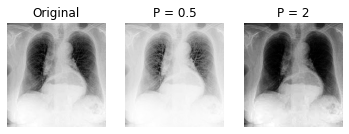

In [10]:
a = i1/255
c = 1
p1 = 0.5
p2 = 2
f1 = c*(a**p1)
f2 = c*(a**p2)
plt.subplot(1,3,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f1)
plt.title('P = 0.5'); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(f2)
plt.title('P = 2'); plt.axis("off")
plt.show()

### Contrast Stretching

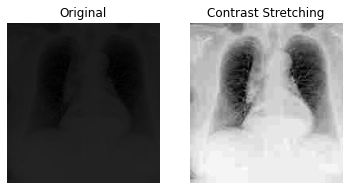

In [11]:
i3 = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/rontgengelap.jpg')
mn = min(i3.flatten())
mx = max(i3.flatten())
b = int(np.floor(255 / (mx - mn)))
i3_cs = (i3 - mn) * b
plt.subplot(1,2,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i3_cs)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()

### Image Histograms

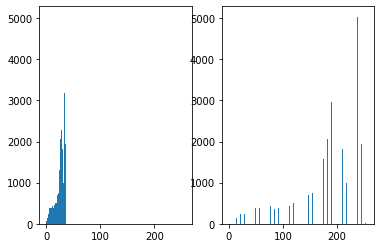

In [12]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(i3))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
gray2 = util.img_as_ubyte(color.rgb2gray(i3_cs))
plt.subplot(1,2,2); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.show()

### Histogram Equalization

In [13]:
from skimage import exposure
eq_i3 = exposure.equalize_hist(i3)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


### Image Subtraction


In [14]:
i1 = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/Gambar-anjing-bulldog.jpg')
i2 = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/Gambar-anjing-bulldog.jpg')
i_subs = np.subtract(i1, i2, dtype='int16')

### b. Mask Processing

### Smoothing Filter

#### Linear Filter

##### Average Filter

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


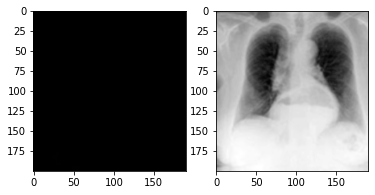

In [173]:
from skimage import filters, morphology
gray = color.rgb2gray(io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/rontgen.jpg'))
fi = filters.rank.mean(gray,selem=morphology.square(3)) 
plt.subplot(1,2,1);
plt.imshow(gray,cmap='gray',vmin=0,vmax=255) 
plt.subplot(1,2,2);
plt.imshow(fi,cmap='gray',vmin=0,vmax=255) 
plt.show()

##### Gausian Filter

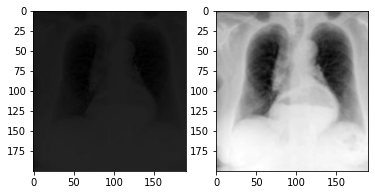

In [170]:
fi = util.img_as_ubyte(filters.gaussian(gray, sigma=1))
plt.subplot(1,2,1);
plt.imshow(i3,cmap='gray',vmin=0,vmax=255) 
plt.subplot(1,2,2);
plt.imshow(fi,cmap='gray',vmin=0,vmax=255) 
plt.show()

#### Non Linear

##### Median FIlter

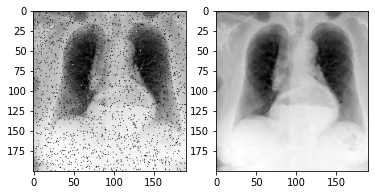

In [172]:
noise=util.img_as_ubyte(util.random_noise(gray, mode='s&p',salt_vs_pepper=0.02)) 
fi=filters.rank.median(noise,selem=morphology.square(3))
plt.subplot(1,2,1);
plt.imshow(noise,cmap='gray',vmin=0,vmax=255) 
plt.subplot(1,2,2);
plt.imshow(fi,cmap='gray',vmin=0,vmax=255) 
plt.show()

##### Maximum Filter

In [18]:
fi=filters.rank.maximum(gray,selem=morphology.square(3))

##### Minimun FIlter

In [19]:
fi=filters.rank.minimum(gray,selem=morphology.square(3))

#### b. Sharpening Filter

##### Roberts, Prewitt, Sobel (edge detection)

In [20]:
gray = color.rgb2gray(i3)
ed1 = util.img_as_ubyte(filters.prewitt(gray)) 
ed2 = util.img_as_ubyte(filters.roberts(gray)) 
ed3 = util.img_as_ubyte(filters.sobel(gray))

gray = color.rgb2gray(io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/rontgen.jpg'))
fi = filters.rank.mean(gray, selem=morphology.square(3)) 
sh = filters.unsharp_mask(fi, radius=3)

##### C. Color Image Processing

##### Color transformation

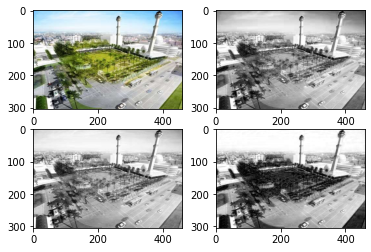

In [21]:
## RGB
RGB = io.imread('/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/131449_alunalunrevitalisasi.png') 
R = RGB[:,:,0]
G = RGB[:,:,1]
B = RGB[:,:,2]
plt.subplot(2,2,1);
plt.imshow(RGB) 
plt.subplot(2,2,2);
plt.imshow(R,cmap='gray',vmin=0,vmax=255) 
plt.subplot(2,2,3);
plt.imshow(G,cmap='gray',vmin=0,vmax=255) 
plt.subplot(2,2,4);
plt.imshow(B,cmap='gray',vmin=0,vmax=255) 
plt.show()

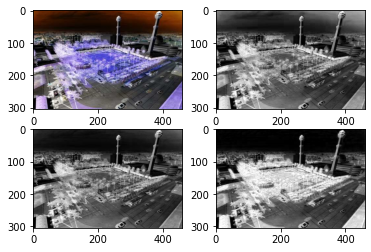

In [22]:
## CMY
C = 1 - util.img_as_float(R) 
M = 1 - util.img_as_float(G) 
Y = 1 - util.img_as_float(B) 
CMY = np.zeros(RGB.shape)
CMY[:,:,0] = C;
CMY[:,:,1] = M; 
CMY[:,:,2] = Y
plt.subplot(2,2,1); 
plt.imshow(CMY) 
plt.subplot(2,2,2); 
plt.imshow(C, cmap='gray') 
plt.subplot(2,2,3); plt.imshow(M, cmap='gray') 
plt.subplot(2,2,4); plt.imshow(Y, cmap='gray') 
plt.show()

In [23]:
## HSV
HSV = color.rgb2hsv(RGB) 
H = HSV[:,:,0]
S = HSV[:,:,1]
V = HSV[:,:,2]

#### Histogram Processing

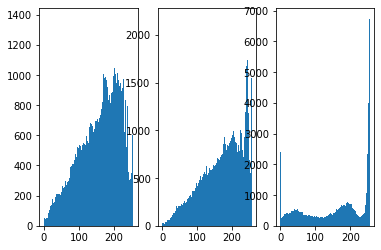

In [24]:
plt.subplot(1,3,1); 
plt.hist(R.flatten(), 256, range=(0,256)) 
plt.subplot(1,3,2); plt.hist(G.flatten(), 256, range=(0,256)) 
plt.subplot(1,3,3); plt.hist(B.flatten(), 256, range=(0,256)) 
plt.show()

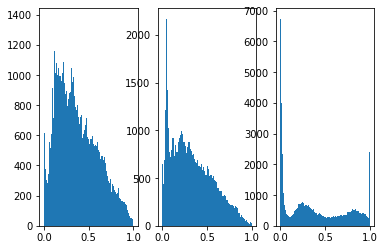

In [25]:
plt.subplot(1,3,1); plt.hist(C.flatten(), 256, range=(0,1))
plt.subplot(1,3,2); plt.hist(M.flatten(), 256, range=(0,1))
plt.subplot(1,3,3); plt.hist(Y.flatten(), 256, range=(0,1)) 
plt.show()

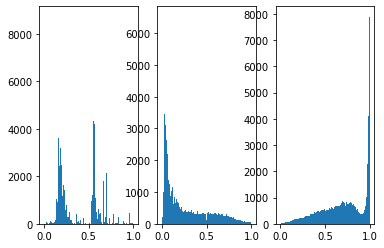

In [26]:
plt.subplot(1,3,1); plt.hist(H.flatten(), 256, range=(0,1))
plt.subplot(1,3,2); plt.hist(S.flatten(), 256, range=(0,1))
plt.subplot(1,3,3); plt.hist(V.flatten(), 256, range=(0,1)) 
plt.show()

### Histogram Equalization

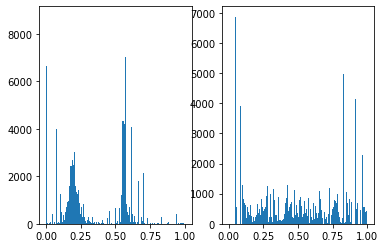

In [27]:
H_eq = exposure.equalize_hist(H)
plt.subplot(1,2,1); 
plt.hist(H.flatten(),256,range=(0,1)) 
plt.subplot(1,2,2); 
plt.hist(H_eq.flatten(),256,range=(0,1)) 
plt.show()

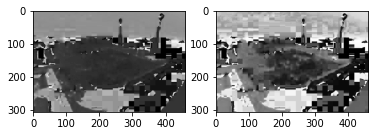

In [28]:
plt.subplot(1,2,1); 
plt.imshow(H, cmap='gray') 
plt.subplot(1,2,2); 
plt.imshow(H_eq, cmap='gray') 
plt.show()

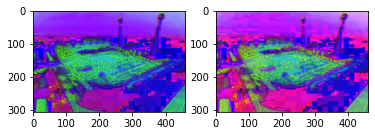

In [29]:
HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H_eq; 
HSV2[:,:,1] = S; 
HSV2[:,:,2] = V
plt.subplot(1,2,1); 
plt.imshow(HSV)
plt.subplot(1,2,2); 
plt.imshow(HSV2) 
plt.show()

##### Smoothing

In [30]:
R2 = filters.rank.mean(R,selem=morphology.square(9)) 
RGB2 = util.img_as_ubyte(np.zeros(RGB.shape)) 
RGB2[:,:,0] = R2; 
RGB2[:,:,1] = G; 
RGB2[:,:,2] = B

In [31]:
S2=util.img_as_float(filters.rank.mean(S,selem=morphology.square(9)))
HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H; 
HSV2[:,:,1] = S2; 
HSV2[:,:,2] = V

In [32]:
Res = color.hsv2rgb(HSV2)

##### - Sharpening

In [33]:
G2 = util.img_as_ubyte(filters.unsharp_mask(G, radius=5, amount=2))

In [34]:
RGB2 = util.img_as_ubyte(np.zeros(RGB.shape)) 
RGB2[:,:,0] = R; 
RGB2[:,:,1] = G2; 
RGB2[:,:,2] = B

In [35]:
H2 = filters.unsharp_mask(H, radius=5, amount=2)
HSV2 = np.zeros(HSV.shape)
HSV2[:,:,0] = H2; 
HSV2[:,:,1] = S;
HSV2[:,:,2] = V
Res = color.hsv2rgb(HSV2)

## TUGAS 

### Image brightness

In [133]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage.exposure 

In [132]:
%cd /content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/Contoh Citra/

/content/drive/MyDrive/KELAS SIB BISA AI AL RESEARCH/IMAGE PROCESSING/Contoh Citra


Original Image


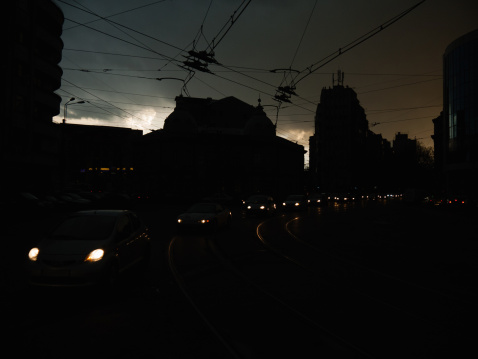

After image brightness


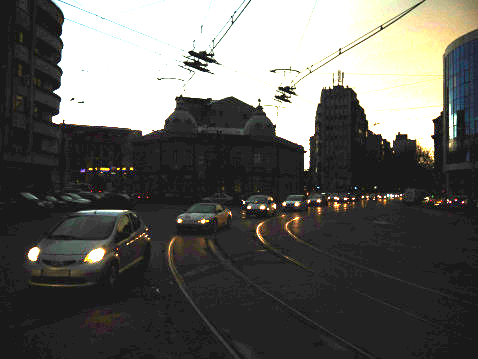

In [135]:
gelap1 = cv2.imread('gelap1.jpg')
img1 = skimage.exposure.rescale_intensity(gelap1, in_range=(0, 30), out_range=(0, 255))
print('Original Image')
cv2_imshow(gelap1)
print('After image brightness')
cv2_imshow(img1)

Original Image


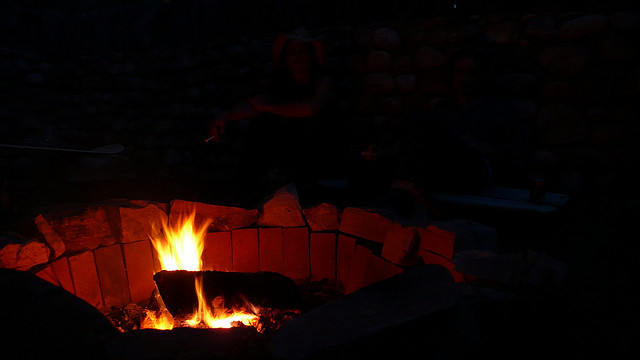

After image brightness


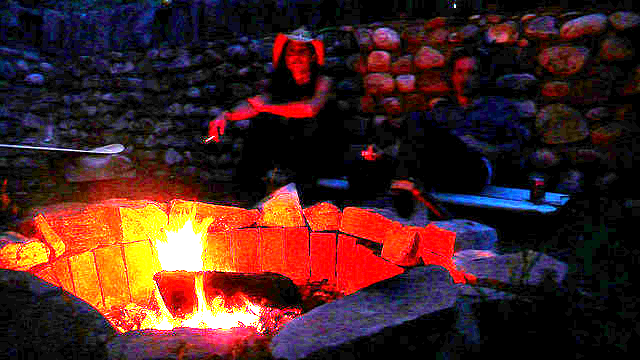

In [159]:
gelap2 = cv2.imread('gelap2.jpg')
img2 = skimage.exposure.rescale_intensity(gelap2, in_range=(0, 20), out_range=(0, 255))
print('Original Image')
cv2_imshow(gelap2)
print('After image brightness')
cv2_imshow(img2)


### Subtracted Image

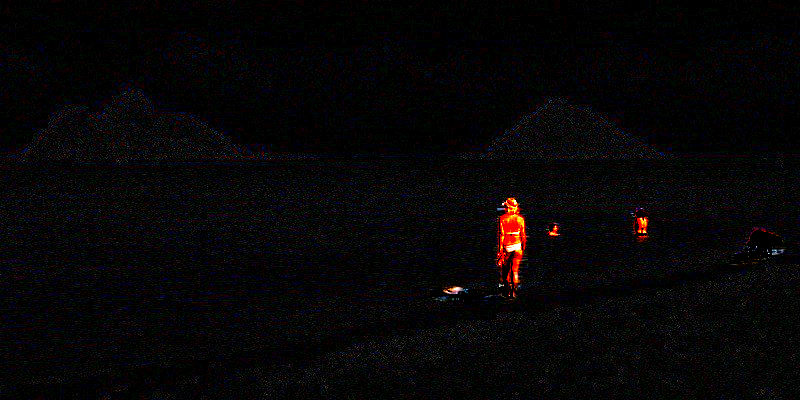

In [137]:
pantai1 = cv2.imread('pantai1.jpg')
pantai2 = cv2.imread('pantai2.jpg')
pantai3 = cv2.subtract(pantai1, pantai2)
brightness_pantai = skimage.exposure.rescale_intensity(pantai3, in_range=(0, 50), out_range=(0, 255))
cv2_imshow(brightness_pantai)

### Mencari informasi pada gambar

Image Sharpened


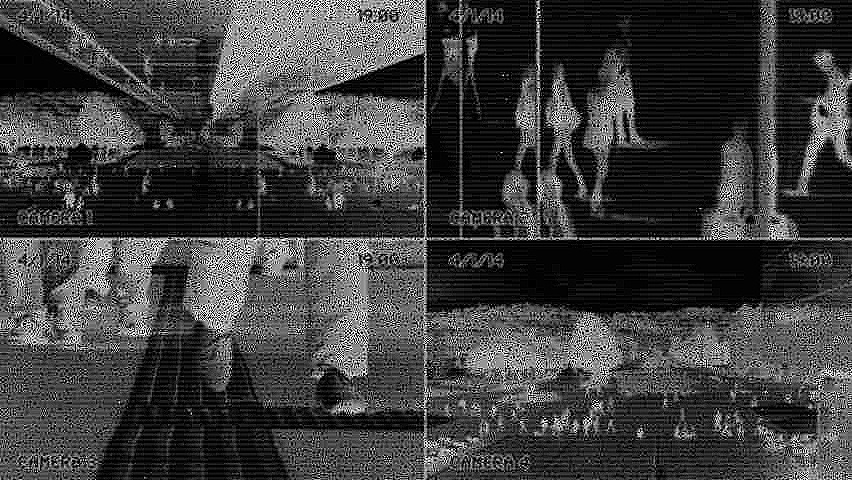

In [205]:
cctv = cv2.imread('cctv.jpg')
img_cctv = skimage.exposure.rescale_intensity(cctv, in_range=(0, 60), out_range=(0, 200))
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=img_cctv, ddepth=-1, kernel=kernel)
print('Image Sharpened')
cv2_imshow(image_sharp)

Keterangan dari gambar di atas : 
Terdapat 4 camera cctv yang memantau kegiatan di sebuah jalan raya. Adapun  waktu dan tanggal pada setiap camera adalah tanggal 4/1/14 pada saat pukul 19.00. 


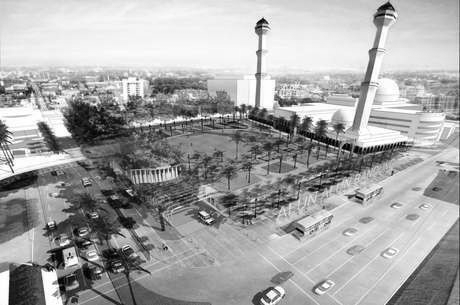

In [144]:
cctv = cv2.imread('131449_alunalunrevitalisasi.png')
rgb_image = cv2.cvtColor(cctv, cv2.COLOR_)
cv2_imshow(rgb_image)